In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to fit the CNN input (28x28 images with 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and feed it into Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

c:\Users\Lenovo\staff\ML-course-repo\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8961 - loss: 0.3396 - val_accuracy: 0.9851 - val_loss: 0.0447
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9858 - loss: 0.0479 - val_accuracy: 0.9884 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9914 - val_loss: 0.0303
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9892 - val_loss: 0.0357


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 4s - 12ms/step - accuracy: 0.9892 - loss: 0.0357

Test accuracy: 0.9891999959945679


In [7]:
predictions = model.predict(x_test)

# Example: Display the first prediction
print(np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
7


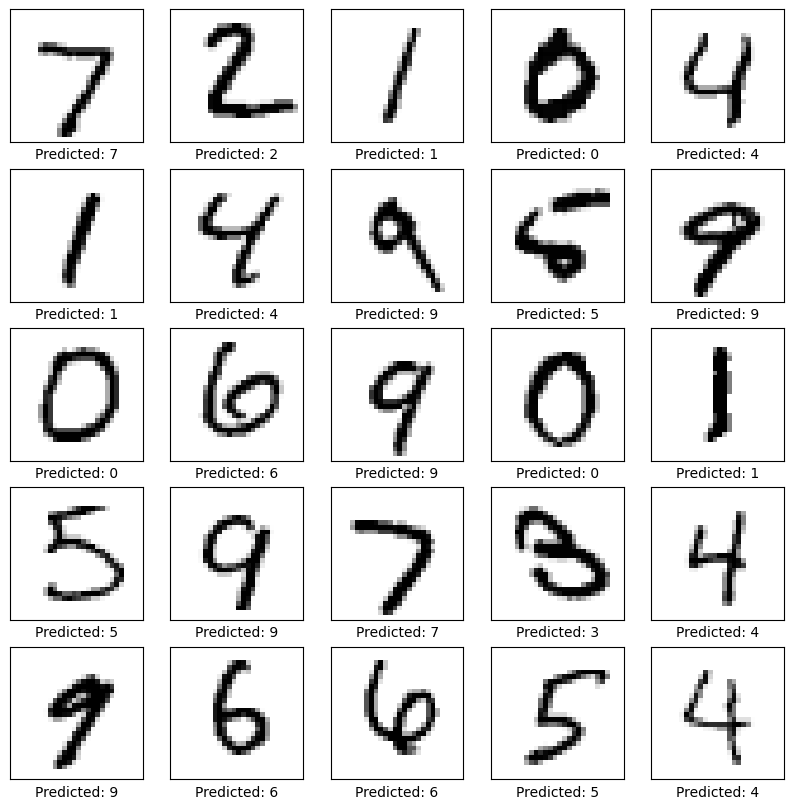

In [8]:
# Plot the first few test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {np.argmax(predictions[i])}')
plt.show()